---

<div style="display: flex; align-items: center; justify-content: space-between">
    <div>
        <img src="https://raw.githubusercontent.com/sebastianVP/RADAR_AMISR/refs/heads/main/igp_logo.jpeg"
         alt="LOGO IGP" width="200" height="200" style="margin-left: 20px; border-radius: 10px;" align = "right">
        <h1 style="color: #800020;  font-weight: bold; margin-bottom: 10px; font-family: Arial, sans-serif;">
          <font color="#7F000E">
            Maestría de Ciencias de la Computación UNI-IGP
          </font>
        </h1>
        <h2 style="color: #800020;font-weight: bold; max-width: 750px; font-family: Arial, sans-serif;">
          <strong><font color="#7F000E" size=5 >
            Desarrollo de sistema de pronóstico de centelleo ionosférico sobre el Perú para alerta de
            perturbaciones en señales satelitales
          </font ></strong>
        </h2>
    </div>
</div>
<div>
    <p style="margin-bottom: 5px;">
    <strong>
    <font color="#7F000E" size=4 >Avance de Tesis - Reunión Prociencia</strong></p>
    <p style="margin-bottom: 5px;">
    <font color="#7F000E"><strong>Alumno:</strong></font>
    <font color="#7F000E"> Alexander Valdez Portocarrero</p>
    <p style="margin-bottom: 5px;">
    <font color="#7F000E"><strong>Código:</strong> 20207072E</p>
    <p style="margin-bottom: 5px;">
    <font color="#7F000E"><strong>Fecha:</strong>  20/06/2025</p>
    <p style="margin-bottom: 5px;">
    <font color="#7F000E"><strong> Ciclo 2025-1</strong></p>
</div>

---

* **Asesor universidad:** Msc Manuel A. Quispe Torres
* **Asesor IGP:**     Edgardo Pacheco
* **Links:**
    * [Cronograma](https://docs.google.com/document/d/1bNC2scje2TEX_bFzjqOwl2pB-HshF-SjlXlqNAdOY5Y/edit?usp=sharing)
    * [Repositorio](git@github.com:sebastianVP/CENTELLEO_INOSFERICO_DAML_PERU.git)

**Referencias previas, reportes:**
- [Avance 001](https://colab.research.google.com/drive/1_sO2gMc1r4eIwTT-WL0AzzY02HIRqnvI?usp=sharing)
- [Avance 002](https://colab.research.google.com/drive/15TGa9rezKtoXlxiAHuwkQkdz_O5PTiq-?usp=sharing)

# **DESARROLLO VARIABLE S4**

## **1. Parametro S4**

### **1.1 Cargando el conjunto de Datos, correspondiente a los años 2023-2025 de la Estacion Jicamarca**

In [146]:
import os
PATH     = "/home/soporte/Documents/CENTELLEO_INOSFERICO_DAML_PERU/data"
filename = "JICAMARCA_OCSD.csv"
file_dir = os.path.join(PATH,filename)
print(file_dir)

/home/soporte/Documents/CENTELLEO_INOSFERICO_DAML_PERU/data/JICAMARCA_OCSD.csv


### **1.2 Lectura de Datos**

In [149]:
import pandas as pd
s4_param  = pd.read_csv(file_dir)

In [151]:
s4_param.head()

ID Satélite               Tiempo     S4  Elevación
0            1  2023-01-01 00:01:00  0.077       24.0
1            1  2023-01-01 00:02:00  0.031       24.0
2            1  2023-01-01 00:03:00  0.119       23.0
3            1  2023-01-01 00:04:00  0.208       23.0
4            1  2023-01-01 00:05:00  0.108       22.0

In [153]:
s4_param.describe()

ID Satélite            S4     Elevación
count  2.163378e+07  2.163378e+07  2.163378e+07
mean   6.063381e+01  7.454914e-02  3.594150e+01
std    4.686492e+01  7.335135e-02  1.739590e+01
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    2.300000e+01  2.800000e-02  2.200000e+01
50%    5.100000e+01  5.800000e-02  3.400000e+01
75%    8.900000e+01  1.010000e-01  4.700000e+01
max    2.150000e+02  2.306000e+00  9.000000e+01

### **Ordenamos el dataset por Tiempo**

In [155]:
s4_param =  s4_param.sort_values(by="Tiempo")

In [157]:
s4_param.head()

ID Satélite               Tiempo     S4  Elevación
0                  1  2023-01-01 00:01:00  0.077       24.0
4417958           19  2023-01-01 00:01:00  0.058       20.0
3864960           17  2023-01-01 00:01:00  0.055       22.0
1771042            9  2023-01-01 00:01:00  0.092       41.0
1355919            7  2023-01-01 00:01:00  0.000       81.0

In [159]:
print("Cantidad del dataset:", len(s4_param))

Cantidad del dataset: 21633775


In [161]:
print("Ultimo dato:",s4_param.tail(1))

Ultimo dato:          ID Satélite               Tiempo   S4  Elevación
6948272           28  2025-06-19 23:45:00  0.0       55.0


**Conclusion 1:**
* El dataset contiene 21 633 775 datos.
* Tenemos datos desde el 01 de Enero del año 2023 hasta el 19 de Junio 2025.

### **1.3 PRE-PROCESAMIENTO**

### **FILTRO DE ANGULO DE ELEVACION-USAR UMBRAL DE 30°**

1. Minimizar el efecto multipath:
      * Cuando un satélite está cerca del horizonte (baja elevación), la señal GNSS recorre más atmósfera y tiene más probabilidad de reflejarse en superficies terrestres (edificios, suelo, agua), introduciendo interferencias multipath.
      * Estas reflexiones distorsionan las medidas de fase y amplitud.

2. Reducción de la distorsión atmosférica:
      * A bajas elevaciones, la señal atraviesa más atmósfera, lo que introduce mayor error por refracción, dispersión e interacciones con la ionósfera y la troposfera.

3. Estándares y recomendaciones en investigación:
  * Muchos estudios académicos y operacionales usan 30° como valor estándar.

**NOTA:** El umbral de 30° es un compromiso práctico: filtra señales de mala calidad (por baja elevación) sin descartar demasiada información útil. En contextos más exigentes, algunos usan 40°, y en otros más permisivos, 20°.

**FUENTES**
1. ITU-R P.681-11 (International Telecommunication Union):
  * Define la recomendación de evitar ángulos bajos de elevación para comunicaciones satelitales por sus altos niveles de interferencia.

2. Investigaciones de scintilación ionosférica:
  * En artículos como:
    “Ionospheric Scintillation Effects on GNSS Signals in Equatorial Regions”
    (Kintner, Ledvina & de Paula, 2007)
  * Se recomienda trabajar con elevaciones > 30° para evitar artefactos en la caracterización de cintilaciones.




In [167]:
# FILTRO DE 30° grados
s4_param = s4_param[s4_param["Elevación"]>30]

In [171]:
s4_param.head()

ID Satélite               Tiempo     S4  Elevación
1771042            9  2023-01-01 00:01:00  0.092       41.0
1355919            7  2023-01-01 00:01:00  0.000       81.0
1154240            6  2023-01-01 00:01:00  0.081       42.0
384622             3  2023-01-01 00:01:00  0.046       32.0
7200489           30  2023-01-01 00:01:00  0.037       43.0

In [173]:
print("Cantidad del dataset:", len(s4_param))

Cantidad del dataset: 12068016


**Conclusión 2:**
* El dataset ahora contiene 12 068 016 datos.
* Se ha filtrado la elevación con valores mayores a 30°.

### **DETECCION Y ELIMINACION DE OUTLIERS**

El criterio empleado esta basado en la continuidad del parametro.

1. Ordenaremos por satélite y tiempo el dataset
2. Umbral de diferencia relativa(ajustable).
3. Crearemos la función **detectar_outliers** para detectar outliers sin eliminarlos.

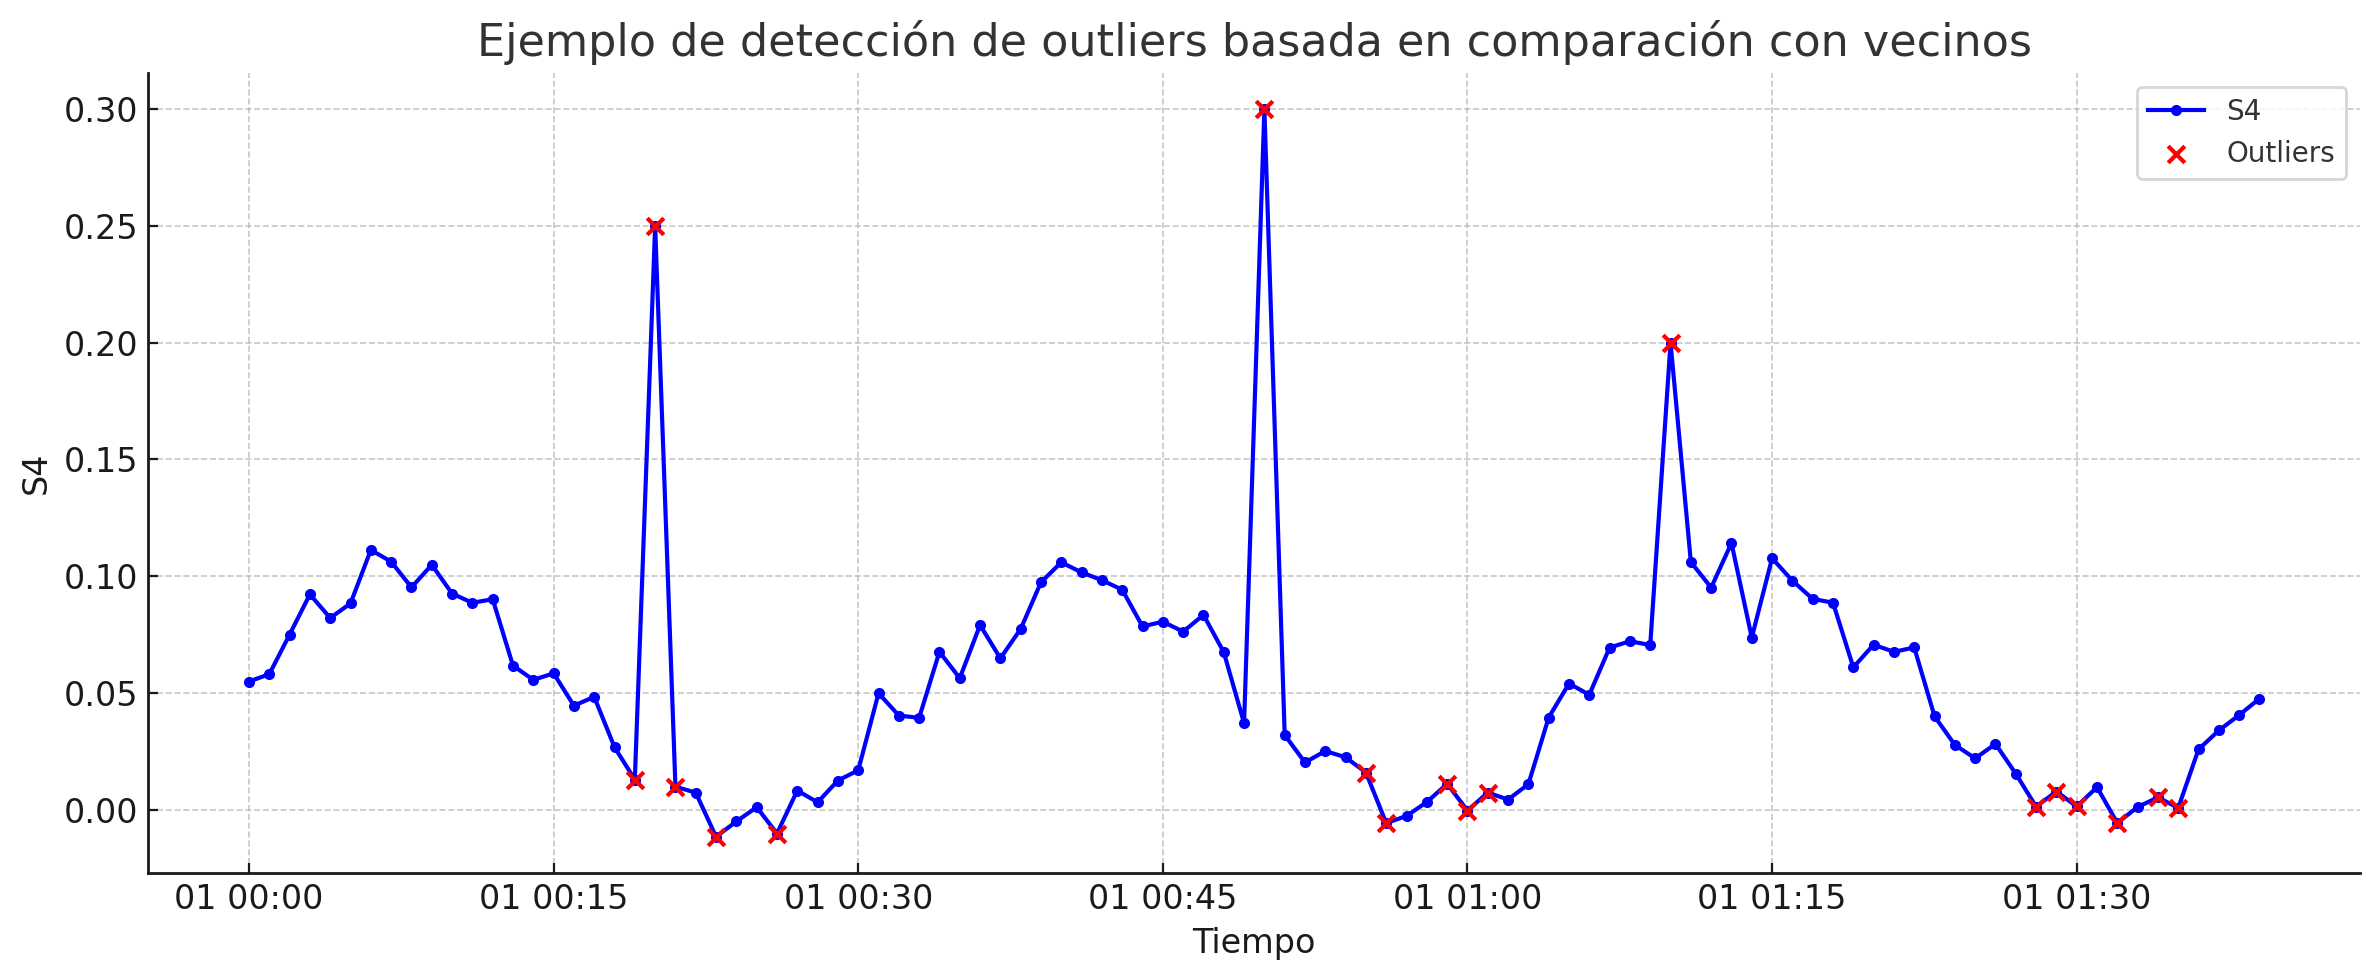

In [187]:
# UMBRAL DE DIFERENCIA RELATIVA(AJUSTABLE)
threshold_ratio =2
# DATAFRAME PARA ALMACENAR OUTLIERS
outliers_detectados = pd.DataFrame()

In [203]:
s4_param.head()

ID Satélite               Tiempo     S4  Elevación
1771042            9  2023-01-01 00:01:00  0.092       41.0
1355919            7  2023-01-01 00:01:00  0.000       81.0
1154240            6  2023-01-01 00:01:00  0.081       42.0
384622             3  2023-01-01 00:01:00  0.046       32.0
7200489           30  2023-01-01 00:01:00  0.037       43.0

In [191]:
# FUNCION PRA DETECTAR OUTLIERS SIN ELIMINARLOS AUN
def detectar_outliers(grupo):
  s4            = grupo['S4'].values
  tiempos       = grupo['Tiempo'].values
  outlier_flags = [False]*len(s4)

  for i in range(1,len(s4)-1):
    prev             = s4[i-1]
    curr             = s4[i]
    nxt              = s4[i+1]
    promedio_vecinos =  (prev+nxt)/2.0

    if promedio_vecinos >0 and abs(curr-promedio_vecinos>threshold_ratio*promedio_vecinos):
      outlier_flags[i] = True

  grupo['is_Outlier'] = outlier_flags
  return grupo

In [205]:
# Ordenar por satélite y tiempo
s4_param.sort_values(by=['ID Satélite','Tiempo'],inplace=True)

In [211]:
s4_param.head(200)

ID Satélite               Tiempo     S4  Elevación
204            1  2023-01-01 19:38:00  0.156       31.0
205            1  2023-01-01 19:39:00  0.069       31.0
206            1  2023-01-01 19:40:00  0.107       31.0
207            1  2023-01-01 19:41:00  0.071       31.0
208            1  2023-01-01 19:42:00  0.090       32.0
..           ...                  ...    ...        ...
399            1  2023-01-01 22:53:00  0.008       53.0
400            1  2023-01-01 22:54:00  0.014       52.0
401            1  2023-01-01 22:55:00  0.008       52.0
402            1  2023-01-01 22:56:00  0.026       51.0
403            1  2023-01-01 22:57:00  0.029       51.0

[200 rows x 4 columns]

In [213]:
#----- APLICAR DETECCION A CADA SATELITE
data_etiquetada = s4_param.groupby('ID Satélite',group_keys=False).apply(detectar_outliers)

/tmp/ipykernel_48096/1882532216.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_etiquetada = s4_param.groupby('ID Satélite',group_keys=False).apply(detectar_outliers)


In [215]:
data_etiquetada.head()

ID Satélite               Tiempo     S4  Elevación  is_Outlier
204            1  2023-01-01 19:38:00  0.156       31.0       False
205            1  2023-01-01 19:39:00  0.069       31.0       False
206            1  2023-01-01 19:40:00  0.107       31.0       False
207            1  2023-01-01 19:41:00  0.071       31.0       False
208            1  2023-01-01 19:42:00  0.090       32.0       False

In [227]:
# EXTRAER OUTLIER
outliers_detectados = data_etiquetada[data_etiquetada['is_Outlier']==True]
# EXTRAER DATOS LIMPIOS
data_s4 = data_etiquetada[data_etiquetada['is_Outlier']==False].copy()


In [240]:
print("Outliers detectados en el dataset:", len(outliers_detectados))

Outliers detectados en el dataset: 106509


In [229]:
data_s4.head()

ID Satélite               Tiempo     S4  Elevación  is_Outlier
204            1  2023-01-01 19:38:00  0.156       31.0       False
205            1  2023-01-01 19:39:00  0.069       31.0       False
206            1  2023-01-01 19:40:00  0.107       31.0       False
207            1  2023-01-01 19:41:00  0.071       31.0       False
208            1  2023-01-01 19:42:00  0.090       32.0       False

In [231]:
data_s4.describe()

ID Satélite            S4     Elevación
count  1.196151e+07  1.196151e+07  1.196151e+07
mean   6.539165e+01  5.053736e-02  4.802278e+01
std    5.204256e+01  4.766486e-02  1.333730e+01
min    1.000000e+00  0.000000e+00  3.100000e+01
25%    2.300000e+01  1.900000e-02  3.700000e+01
50%    5.400000e+01  3.600000e-02  4.400000e+01
75%    9.500000e+01  7.200000e-02  5.800000e+01
max    2.150000e+02  1.466000e+00  9.000000e+01

In [235]:
print("Cantidad del dataset:", len(data_s4))

Cantidad del dataset: 11961507


**Conclusión 3:**
* El dataset ahora contiene 11 961 507 datos.
* Se ha realizado la deteccion y eliminacion de outliers.
* El parametro que contiene toda la informacion ahora se llama **data_s4**

### **FILTRAMOS LOS  ID DE LOS SATÉLITES QUE ESTAN PRESENTES EN LOS 3 AÑOS**

In [366]:
import numpy as np

In [289]:
data_s4['Tiempo'] = pd.to_datetime(data_s4['Tiempo'])

**2023**

In [341]:
ID_2023=data_s4[data_s4['Tiempo'].dt.year==2023]["ID Satélite"].unique()
print(ID_2023)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  72  73  74  75  77  78  79  80  81  82  83  85  89  91  94  95
  96  97 100 101 103 104 106]


**2024**

In [343]:
ID_2024= data_s4[data_s4['Tiempo'].dt.year==2024]["ID Satélite"].unique()
print(ID_2024)

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  72  73  74  75  76  77  78  79  80  81  82  83  85  89  91  94  95
  96  97  99 100 101 103 104 106 131 135 205 215]


**2025**

In [362]:
ID_2025=data_s4[data_s4['Tiempo'].dt.year==2025]["ID Satélite"].unique()
print(ID_2025)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  72  73  74  75  76  77  78  79  80  81  82  83  85  86  89  91
  93  94  95  96  97  99 100 101 103 104 106 131 135 205]


Vamos a buscar aquellos ID Satélites que se repiten en los 3 años.

In [370]:
ID_REPETIDOS = np.intersect1d(np.intersect1d(ID_2023, ID_2024), ID_2025)
print("ID Satélites que se repiten en las tres listas:", ID_REPETIDOS)

ID Satélites que se repiten en las tres listas: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  72  73  74  75  77  78  79  80  81  82  83  85  89  91  94  95  96
  97 100 101 103 104 106]


In [374]:
s4_base = data_s4[data_s4['ID Satélite'].isin(ID_REPETIDOS)]

In [378]:
s4_base.head()

ID Satélite              Tiempo     S4  Elevación  is_Outlier
103981            2 2023-01-01 09:16:00  0.048       31.0       False
103982            2 2023-01-01 09:17:00  0.091       31.0       False
103983            2 2023-01-01 09:18:00  0.033       31.0       False
103984            2 2023-01-01 09:19:00  0.021       32.0       False
103985            2 2023-01-01 09:20:00  0.025       32.0       False

In [380]:
s4_base.describe()

ID Satélite                         Tiempo            S4     Elevación
count  9.735372e+06                        9735372  9.735372e+06  9.735372e+06
mean   4.679575e+01  2024-08-03 11:10:15.024655872  5.489012e-02  4.862361e+01
min    2.000000e+00            2023-01-01 00:01:00  0.000000e+00  3.100000e+01
25%    1.800000e+01            2024-03-18 19:25:00  2.300000e-02  3.700000e+01
50%    4.300000e+01            2024-08-18 03:06:30  4.000000e-02  4.600000e+01
75%    7.700000e+01            2025-01-18 03:59:00  7.700000e-02  5.800000e+01
max    1.060000e+02            2025-06-19 23:45:00  1.466000e+00  9.000000e+01
std    3.170259e+01                            NaN  4.792685e-02  1.360335e+01

**Conclusión 4:**
* El dataset ahora contiene 9 735 372 datos.
* Se ha realizado el filtrado de los 3 años teniendo en cuenta que los ID de los satélites esten presentes en los 3 años.
* El nuevo dataset ahora se llama **s4_base**.

### **ESQUEMA VISUAL DE LA DATA QUE CONTIENE OUTLIERS**

In [259]:
data_etiquetada['Tiempo'] = pd.to_datetime(data_etiquetada['Tiempo'])

In [265]:
# FUNCION PARA GRAFICAR POR SATELITE
import plotly.express
import plotly.graph_objects as go

def graficar_satelite(id,year):
    df_sat = data_etiquetada[(data_etiquetada['ID Satélite']==id) &
                             (data_etiquetada['Tiempo'].dt.year==year)]
    outliers = df_sat[df_sat['is_Outlier'] == True]
    normales = df_sat[df_sat['is_Outlier'] == False]
    fig = go.Figure()
        # Datos normales
    fig.add_trace(go.Scatter(
        x=normales['Tiempo'],y=normales['S4'],
        mode='markers+lines', name='Normal',marker=dict(color='blue', size=6),line=dict(color='lightblue')
    ))

    # Outliers
    fig.add_trace(go.Scatter(
        x=outliers['Tiempo'],y=outliers['S4'],
        mode='markers',name='Outliers',marker=dict(color='red', size=8, symbol='x')
    ))

    fig.update_layout(
        title=f"S4 para el satélite {id}",xaxis_title="Tiempo",
        yaxis_title="S4",template="plotly_white",
        hovermode="closest",legend=dict(x=0.01, y=0.99),
        height=400,margin=dict(t=50, b=40, l=50, r=20)
    )

    fig.show()  

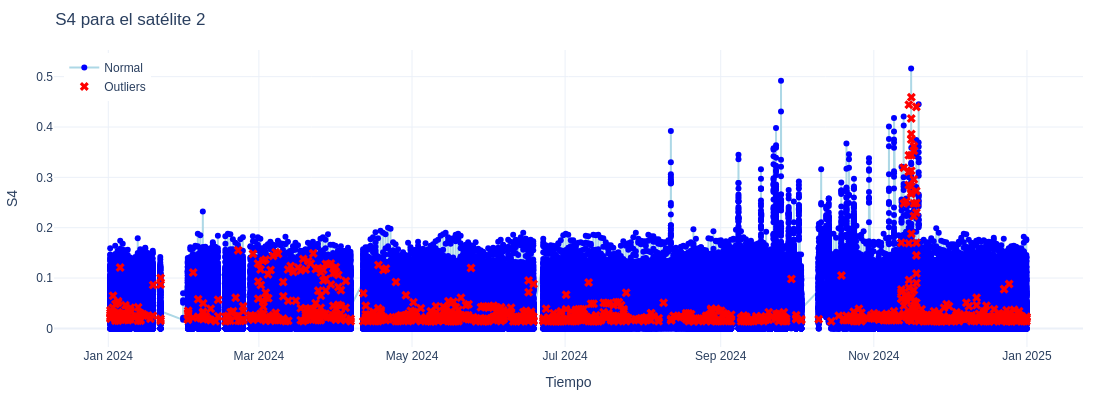

In [396]:
graficar_satelite(2,2024)

## **ESQUEMA VISUAL DE GRAFICOS POR PERIODO**

In [419]:
# Función para graficar diferentes períodos
import matplotlib.pyplot as plt
from datetime import timedelta

def graficar_por_periodo(df, inicio, fin, titulo):
    # Filtrar los datos por el rango de fechas
    datos_filtrados = df[(df['Tiempo'] >= inicio) & (df['Tiempo'] <= fin)]

    # Crear el gráfico
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar S4 en el eje Y izquierdo
    ax1.plot(datos_filtrados['Tiempo'], datos_filtrados['S4'], color='blue', marker='o', label='S4')
    ax1.set_xlabel('Tiempo')  # Etiqueta del eje X
    ax1.set_ylabel('S4', color='blue')  # Etiqueta del eje Y izquierdo
    ax1.tick_params(axis='y', labelcolor='blue')

    # Formato de fechas en el eje X
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)

    # Crear el segundo eje Y (derecho) para la Elevación
    ax2 = ax1.twinx()
    ax2.plot(datos_filtrados['Tiempo'], datos_filtrados['Elevación'], color='red', marker='s', label='Elevación')
    ax2.set_ylabel('Elevación', color='red')  # Etiqueta del eje Y derecho
    ax2.tick_params(axis='y', labelcolor='red')

    # Título y diseño
    plt.title(titulo, fontsize=12)
    fig.tight_layout()  # Ajustar diseño
    plt.show()

#### **FILTRANDO UN SATELITE POR ID**

In [421]:
ID_Sat_2 = s4_base[s4_base['ID Satélite'] == 2]

In [423]:
ID_Sat_2.head()

ID Satélite              Tiempo     S4  Elevación  is_Outlier
103981            2 2023-01-01 09:16:00  0.048       31.0       False
103982            2 2023-01-01 09:17:00  0.091       31.0       False
103983            2 2023-01-01 09:18:00  0.033       31.0       False
103984            2 2023-01-01 09:19:00  0.021       32.0       False
103985            2 2023-01-01 09:20:00  0.025       32.0       False

#### **GRAFICO DE 1 DIA**

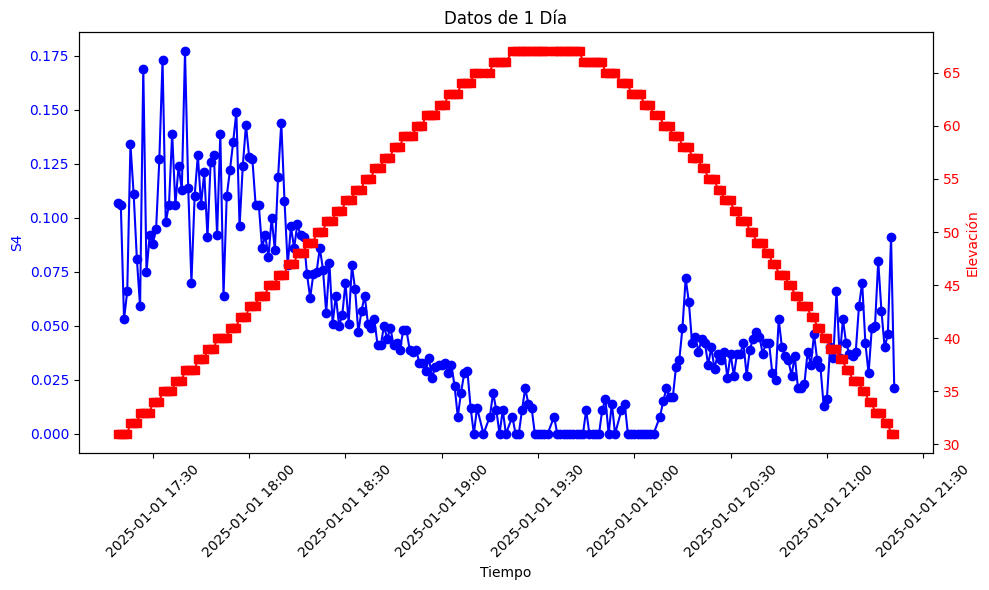

In [435]:
# Crear intervalos de tiempo para probar la funcionalidad
from datetime import timedelta
# OFFSET DE AÑOS
hoy = s4_base['Tiempo'].min()+pd.DateOffset(years=2) # Fecha inicial del dataset

# 1 día de datos
inicio_dia = hoy
fin_dia = hoy + timedelta(days=1)
graficar_por_periodo(ID_Sat_2, inicio_dia, fin_dia, 'Datos de 1 Día')

#### **Grabamos la DATA FINAL en esta primera etapa de Preprocesamiento**

In [442]:
s4_base.to_csv('s4_base.csv',index=False)